## Repeated collisions

Problem: ["The most unexpected answer to a counting puzzle"](https://www.youtube.com/watch?v=HEfHFsfGXjs)

In [1]:
# library for higher precision arithmetic
from mpmath import mp

A has mass 1, initial velocity 0.
B has mass m, initial velocity -1.

Conservation of momentum
$$u_1+mu_2=v_1+mv_2$$

Perfectly elastic collisions
$$v_2-v_1=u_1-u_2$$

(This is equivalent to conservation of KE)

Solving simultaneously yields
$$\begin{cases}
v_1=\dfrac{2mu_2-(m-1)u_1}{m+1}\\
v_2=\dfrac{2u_1+(m-1)u_2}{m+1}
\end{cases}$$

As a Python function:

In [2]:
def collide(a, b, m=mp.mpf(10)):
    c = (a*(1-m)+2*m*b)/(m+1)
    d = (2*a+(m-1)*b)/(m+1)
    return c, d

We can iterate this until B 'escapes' i.e. until $u_2>u_1$:

In [3]:
def repeated_collisions(a = mp.mpf(0), b = mp.mpf(-1), m = mp.mpf(10)):
    count = 0
    while b < a:
        count += 1
        a, b = collide(a, b, m)
        #print("{}:\t a={}\t b={}\t KE={}\t Mom={}".format(count, a, b, 0.5*a**2+0.5*m*b**2, a+m*b))
        # a is -ve then it will collide with the wall and its direction of motion will be reversed
        if a < 0:
            count += 1
            a = abs(a)
            #print("{}: Hit wall".format(count))
    return count

In [4]:
repeated_collisions(m = mp.mpf(1))

3

In [5]:
repeated_collisions(m = mp.mpf(100))

31

In [6]:
repeated_collisions(m = mp.mpf(10000))

314

Let's see how the number of collisions increases with the mass of B:

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
collisions  = [repeated_collisions(m = mp.mpf(n)) for n in range(5000)]

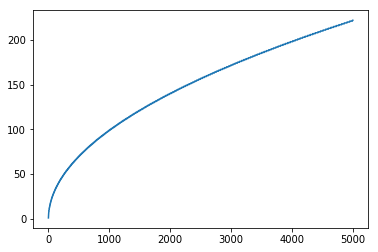

In [9]:
plt.plot(collisions);

This looks roughly $\propto \sqrt{m}$, so try that:

In [10]:
coll_mod = [np.sqrt(n) for n in range(5000)]

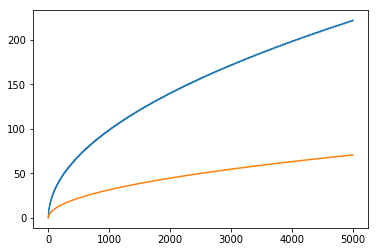

In [11]:
plt.plot(collisions)
plt.plot(coll_mod);

No good. We clearly need to scale this up. Try 4

In [12]:
coll_mod = [4*np.sqrt(n) for n in range(5000)]

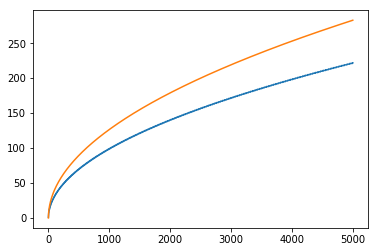

In [13]:
plt.plot(collisions)
plt.plot(coll_mod);

Better, but too high. How about 3?

In [14]:
coll_mod = [3*np.sqrt(n) for n in range(5000)]

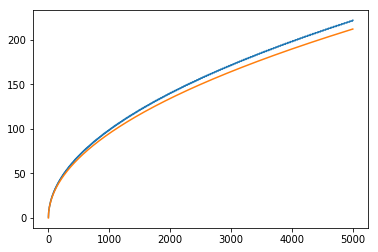

In [15]:
plt.plot(collisions)
plt.plot(coll_mod);

Too low. Guess where this is going..?

In [16]:
coll_mod = [3.1*np.sqrt(n) for n in range(5000)]

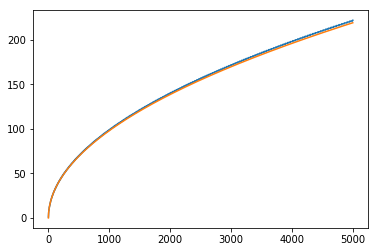

In [17]:
plt.plot(collisions)
plt.plot(coll_mod);

Experimentally it looks like the number of collisions grows as
$$\pi\sqrt{m}$$

So, what's the significance of powers of 100?

More: [So why do colliding blocks compute pi?](https://www.youtube.com/watch?v=jsYwFizhncE)